# Step 1: Convert Photos to NP Arrays

In [182]:
import os
from PIL import Image
import numpy as np

# Define the data directories
folder_benign_train = '/Users/maycaj/Documents/Hyperspectral-Imaging/skin-cancer-detection-data/train/benign'
folder_malignant_train = '/Users/maycaj/Documents/Hyperspectral-Imaging/skin-cancer-detection-data/train/malignant'
folder_benign_test = '/Users/maycaj/Documents/Hyperspectral-Imaging/skin-cancer-detection-data/test/benign'
folder_malignant_test = '/Users/maycaj/Documents/Hyperspectral-Imaging/skin-cancer-detection-data/test/malignant'

def image_to_NP(folder):
    files_converted = 0
    NP_images = []
    for filename in os.listdir(folder):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # find file path of each image
            file_path = os.path.join(folder, filename)
            # Open the image using PIL
            image = Image.open(file_path)
            # Convert the PIL image to a NumPy array
            image_array = np.array(image)
            # Append the NumPy array to the list
            NP_images.append(image_array)
        files_converted += 1
    print('total files converted: ', files_converted)
    print('length of NP_images: ',len(NP_images))
    return NP_images
# Now, the `image_arrays` list contains NumPy arrays of all the images in the folder

X_train_benign = image_to_NP(folder_benign_train)
X_train_malignant = image_to_NP(folder_malignant_train)
X_test_benign = image_to_NP(folder_benign_test)
X_test_malignant = image_to_NP(folder_malignant_test)


total files converted:  1440
length of NP_images:  1440
total files converted:  1197
length of NP_images:  1197
total files converted:  361
length of NP_images:  360
total files converted:  300
length of NP_images:  300


In [183]:
print(X_train_benign[0].shape)
print(len(X_train_benign))

(224, 224, 3)
1440


# Step 2: Label, combine, and shuffle the data

In [184]:
## Label benign = 1 and label malignant = 0
y_train_benign = np.zeros((len(X_train_benign),1))
y_train_malignant = np.ones((len(X_train_malignant),1))
y_test_benign = np.zeros((len(X_test_benign),1))
y_test_malignant = np.ones((len(X_test_malignant),1))
# print(y_test_benign.shape)
# print(y_test_malignant.shape)

## Merge Benign and Malignant data  
X_train = np.concatenate((X_train_benign, X_train_malignant), axis = 0)
y_train = np.concatenate((y_train_benign, y_train_malignant), axis = 0)
X_test = np.concatenate((X_test_benign, X_test_malignant), axis = 0)
y_test = np.concatenate((y_test_benign, y_test_malignant), axis = 0)
# print(y_test.shape)
# print(X_test.shape)

## Shuffle X and y data
train_index = np.arange(X_train.shape[0]) # makes X indicies
np.random.shuffle(train_index) # shuffles X indicies
X_train = X_train[train_index]
y_train = y_train[train_index]

test_index = np.arange(X_test.shape[0])
np.random.shuffle(test_index)
X_test = X_test[test_index]
y_test = y_test[test_index]

print(y_train[0:10])
print(y_test[0:10])

[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]]
[[1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]]


In [185]:
index = np.arange(5)
print(index)
np.random.shuffle(index)
print(index)

[0 1 2 3 4]
[0 3 1 2 4]


# Step 3: Visualize data

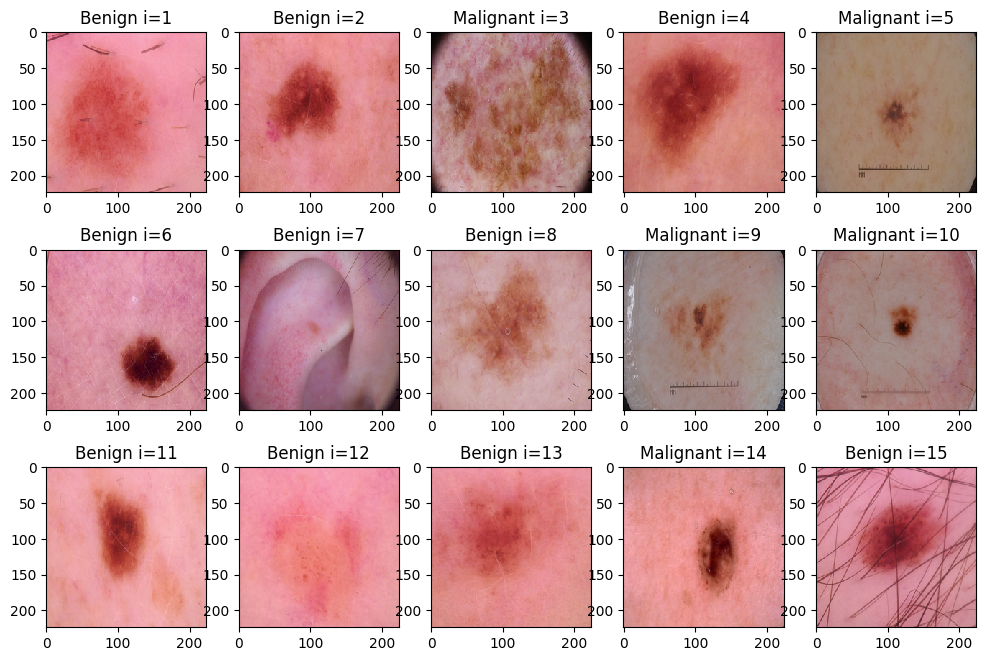

In [186]:
import matplotlib.pyplot as plt

# Display first 15 images of moles, and how they are classified
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign i=' + str(i))
    else:
        ax.title.set_text('Malignant i=' + str(i))
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

# Step 4: Convert data to one-hot encoding and normalize

In [194]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes= 2)
y_test = to_categorical(y_test, num_classes= 2)

print(y_train.shape)
print(y_test.shape)

# not sure if I need to normalize, but better safe than sorry
X_train = X_train/255.
X_test = X_test/255.

(2637, 2)
(660, 2)
